# Heart Failure Prediction Project

## Models- Logistic Regression,KNN,DecisionTree,Random Forest,Gradient Boosting Classifier

###  Import Required Libraries 

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



### Reading Csv File and Checking Info

In [7]:
hf=pd.read_csv(r'C:\Users\DAKSHIN\Desktop\PGP Analytics\kaggle\heart_failure_clinical_records_dataset.csv')

In [8]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#time= Follow up period(days)

In [9]:
hf.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### Renaming Columns 

In [10]:
hf = hf.rename(columns = {'ejection_fraction': 'Blood_fraction', 'creatinine_phosphokinase': 'Creatine kinase',}, inplace = False)

In [11]:
hf.head(10)

,age,anaemia,Creatine kinase,diabetes,Blood_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [12]:
hf.describe()

,age,anaemia,Creatine kinase,diabetes,Blood_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Checking Missing Values 

In [13]:
hf.isnull().sum()

age                    0
anaemia                0
Creatine kinase        0
diabetes               0
Blood_fraction         0
high_blood_pressure    0
platelets              0
serum_creatinine       0
serum_sodium           0
sex                    0
smoking                0
time                   0
DEATH_EVENT            0
dtype: int64

### Visualising   Age Column 


In [14]:
hf.age

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

Text(0.5, 1.0, 'HIstogram of Age')

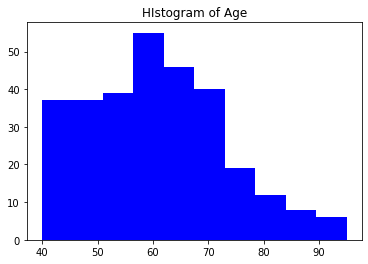

In [15]:
plt.hist(hf.age,color='blue')
plt.title('HIstogram of Age')

Text(0.5, 1.0, 'Boxplot of Age')

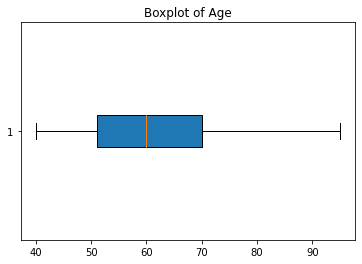

In [16]:
plt.boxplot(hf.age,vert=False ,patch_artist=True)
plt.title('Boxplot of Age')

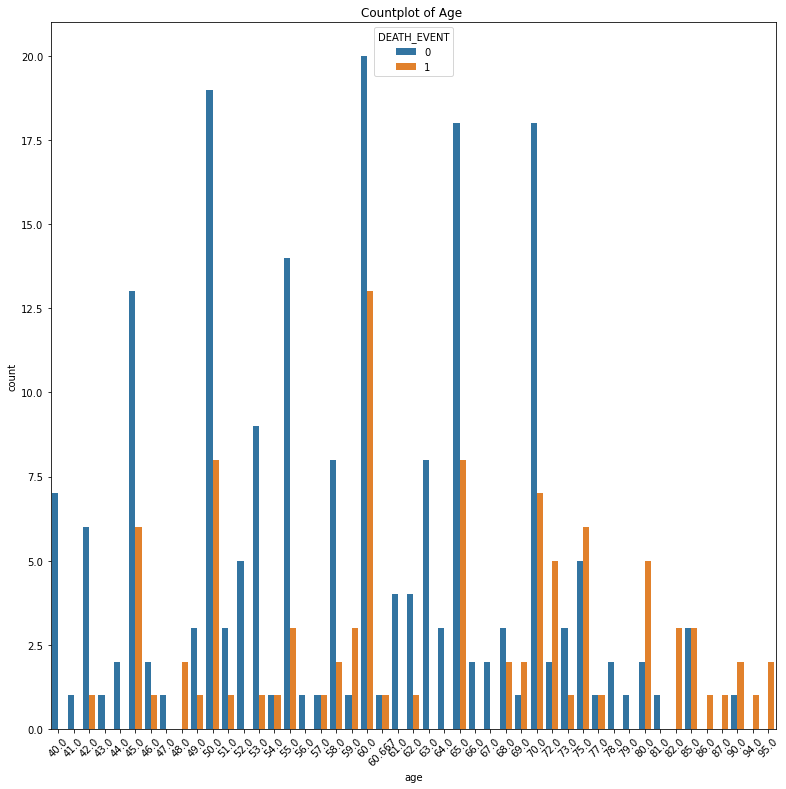

In [45]:
fig, ax = plt.subplots(figsize=(13, 13))
plt.xticks(rotation=45)
sns.countplot(x="age", hue="DEATH_EVENT", data=hf, )
plt.title('Countplot of Age ')

plt.show()

### Visualising Anaemia Column



Text(0.5, 1.0, 'HIstogram of anaemia')

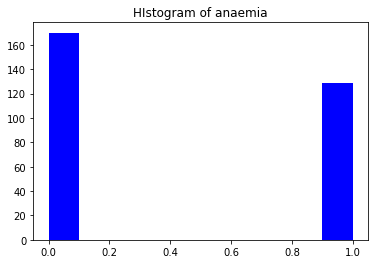

In [18]:
plt.hist(hf.anaemia,color='blue')
plt.title('HIstogram of anaemia')



Text(0.5, 1.0, 'Boxplot of anaemia')


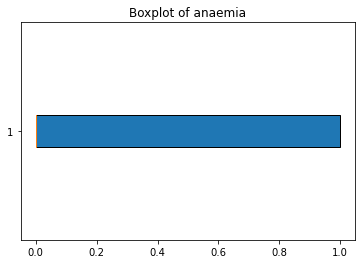

In [19]:
plt.boxplot(hf.anaemia,vert=False ,patch_artist=True)
print(plt.title('Boxplot of anaemia'))

<AxesSubplot:xlabel='anaemia', ylabel='count'>

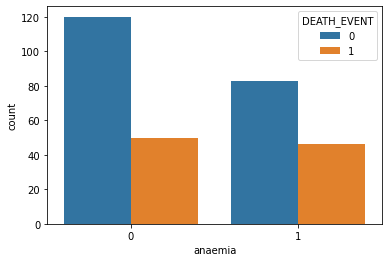

In [20]:
sns.countplot(x="anaemia", hue="DEATH_EVENT", data=hf, )

 ### Visualising Creatine kinase Column


Text(0.5, 1.0, 'HIstogram of Creatine kinase')

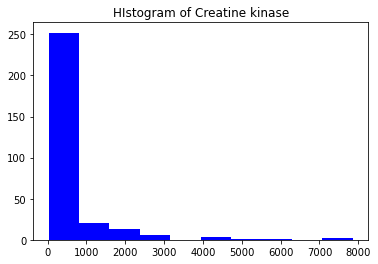

In [21]:
plt.hist(hf['Creatine kinase'],color='blue')
plt.title('HIstogram of Creatine kinase')



Text(0.5, 1.0, 'Boxplot of Creatine kinase')


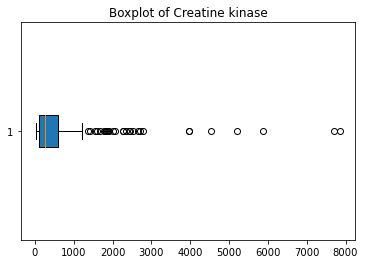

In [22]:
plt.boxplot(hf['Creatine kinase'],vert=False ,patch_artist=True)
print(plt.title('Boxplot of Creatine kinase'))




### Ignore Outliers

In [23]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    int64  
 2   Creatine kinase      299 non-null    int64  
 3   diabetes             299 non-null    int64  
 4   Blood_fraction       299 non-null    int64  
 5   high_blood_pressure  299 non-null    int64  
 6   platelets            299 non-null    float64
 7   serum_creatinine     299 non-null    float64
 8   serum_sodium         299 non-null    int64  
 9   sex                  299 non-null    int64  
 10  smoking              299 non-null    int64  
 11  time                 299 non-null    int64  
 12  DEATH_EVENT          299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


 ### Visualising Diabetes Column

Text(0.5, 1.0, 'HIstogram of diabetes')

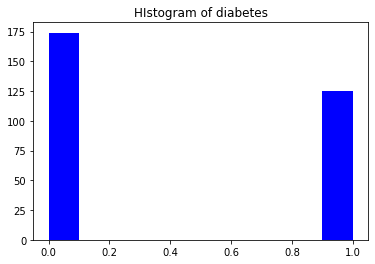

In [24]:
plt.hist(hf.diabetes,color='blue')
plt.title('HIstogram of diabetes')

Text(0.5, 1.0, 'Boxplot of diabetes')


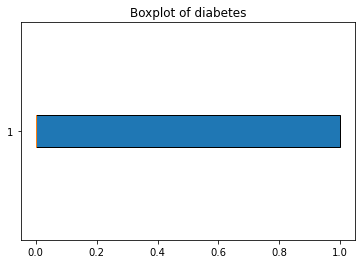

In [25]:
plt.boxplot(hf.diabetes,vert=False ,patch_artist=True)
print(plt.title('Boxplot of diabetes'))



<AxesSubplot:xlabel='diabetes', ylabel='count'>

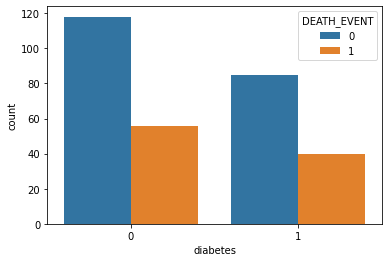

In [26]:
sns.countplot(x="diabetes", hue="DEATH_EVENT", data=hf, )

 ### Visualising Blood_fraction Column

Text(0.5, 1.0, 'HIstogram of Blood_fraction')

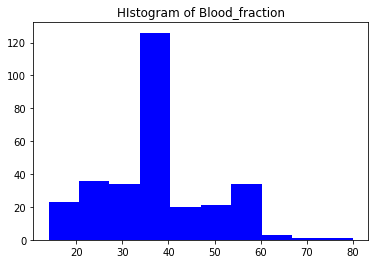

In [27]:


plt.hist(hf.Blood_fraction,color='blue')
plt.title('HIstogram of Blood_fraction')

<AxesSubplot:xlabel='Blood_fraction', ylabel='count'>

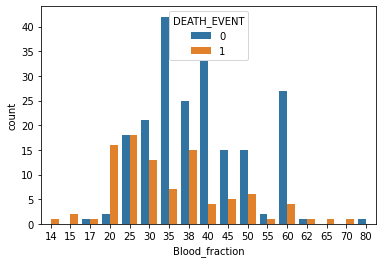

In [28]:
sns.countplot(x="Blood_fraction", hue="DEATH_EVENT", data=hf, )



Text(0.5, 1.0, 'Boxplot of Blood_fraction')

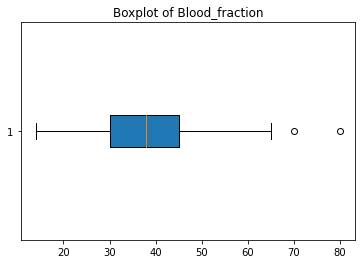

In [29]:
plt.boxplot(hf.Blood_fraction,vert=False ,patch_artist=True)
plt.title('Boxplot of Blood_fraction')

### Ignore Outliers

### Visualising High_blood_pressure Column


Text(0.5, 1.0, 'Histogram of high_blood_pressure')

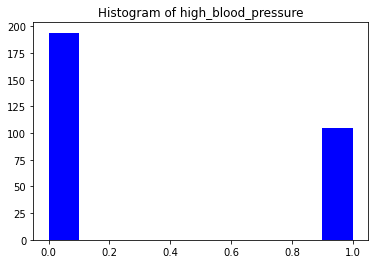

In [30]:

plt.hist(hf.high_blood_pressure,color='blue')
plt.title('Histogram of high_blood_pressure')

Text(0.5, 1.0, 'Boxplot of high_blood_pressure')


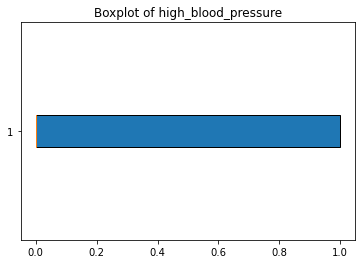

In [31]:


plt.boxplot(hf.high_blood_pressure,vert=False ,patch_artist=True)
print(plt.title('Boxplot of high_blood_pressure'))


<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

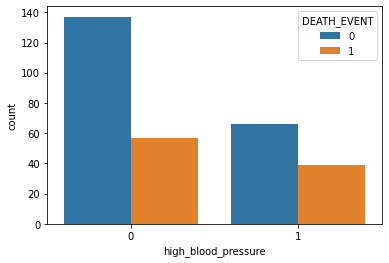

In [32]:
sns.countplot(x="high_blood_pressure", hue="DEATH_EVENT", data=hf, )

In [33]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    int64  
 2   Creatine kinase      299 non-null    int64  
 3   diabetes             299 non-null    int64  
 4   Blood_fraction       299 non-null    int64  
 5   high_blood_pressure  299 non-null    int64  
 6   platelets            299 non-null    float64
 7   serum_creatinine     299 non-null    float64
 8   serum_sodium         299 non-null    int64  
 9   sex                  299 non-null    int64  
 10  smoking              299 non-null    int64  
 11  time                 299 non-null    int64  
 12  DEATH_EVENT          299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Visualising Platelets Column


Text(0.5, 1.0, 'HIstogram of platelets')

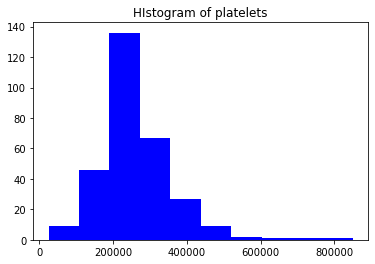

In [34]:

plt.hist(hf.platelets,color='blue')
plt.title('HIstogram of platelets')

Text(0.5, 1.0, 'Boxplot of platelets')


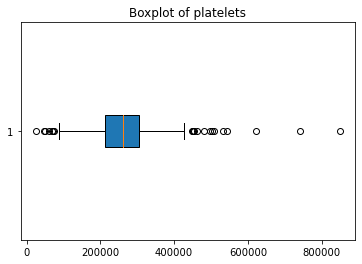

In [33]:


plt.boxplot(hf.platelets,vert=False ,patch_artist=True)
print(plt.title('Boxplot of platelets'))


### Outlier Operation 

In [34]:
#Getting the Iqr, up_lim & low_lim
iqr = hf.platelets.describe()['75%'] - hf.platelets.describe()['25%'] 
low_lim = hf.platelets.describe()['25%']-1.5*iqr 
print(len(hf.platelets[hf.platelets < low_lim]) )
up_lim = hf.platelets.describe()['75%']+1.5*iqr 
print(len(hf.platelets[hf.platelets > up_lim]))


7
14


In [35]:
hf.platelets.value_counts().sum()

299

In [36]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    int64  
 2   Creatine kinase      299 non-null    int64  
 3   diabetes             299 non-null    int64  
 4   Blood_fraction       299 non-null    int64  
 5   high_blood_pressure  299 non-null    int64  
 6   platelets            299 non-null    float64
 7   serum_creatinine     299 non-null    float64
 8   serum_sodium         299 non-null    int64  
 9   sex                  299 non-null    int64  
 10  smoking              299 non-null    int64  
 11  time                 299 non-null    int64  
 12  DEATH_EVENT          299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Visualising Serum_creatinine Column


Text(0.5, 1.0, 'HIstogram of serum_creatinine')

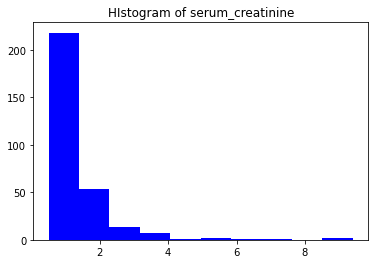

In [37]:


plt.hist(hf.serum_creatinine,color='blue')
plt.title('HIstogram of serum_creatinine')

Text(0.5, 1.0, 'Boxplot of serum_creatinine')


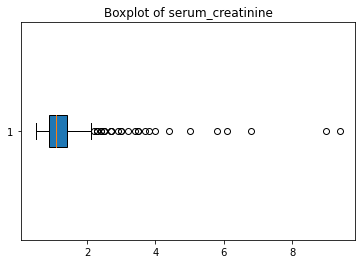

In [38]:


plt.boxplot(hf.serum_creatinine,vert=False ,patch_artist=True)
print(plt.title('Boxplot of serum_creatinine'))

### Outlier Operation 

In [39]:
iqrSC = hf.serum_creatinine.describe()['75%'] - hf.serum_creatinine.describe()['25%'] 

up_lim = hf.serum_creatinine.describe()['75%']+1.5*iqrSC 
print(len(hf.serum_creatinine[hf.serum_creatinine > up_lim]))

29


In [40]:
hf.serum_creatinine.value_counts().sum()

299

### Comparing Serum_creatinine and Target Variable

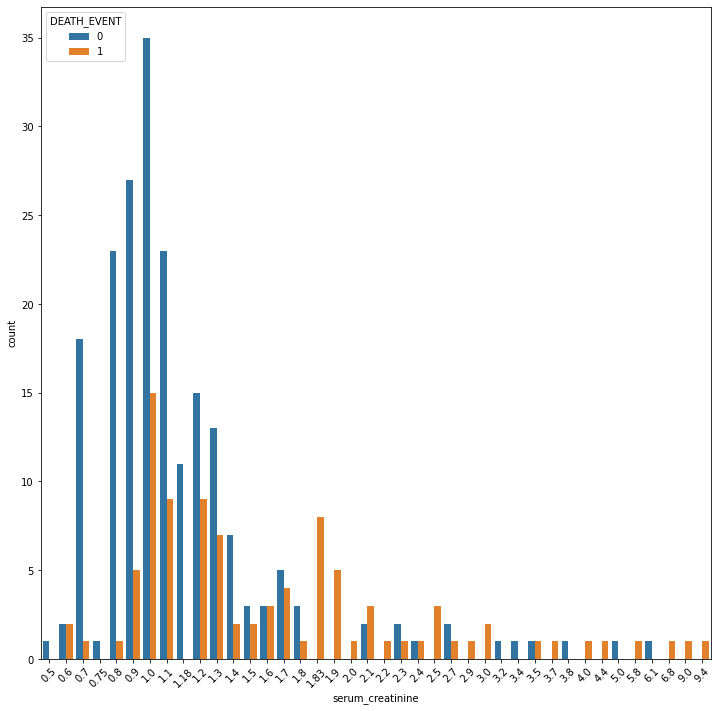

In [46]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.xticks(rotation=45)
sns.countplot(x="serum_creatinine", hue="DEATH_EVENT", data=hf, )
plt.show()

### Visualising Serum_sodium Column

Text(0.5, 1.0, 'HIstogram of serum_sodium')

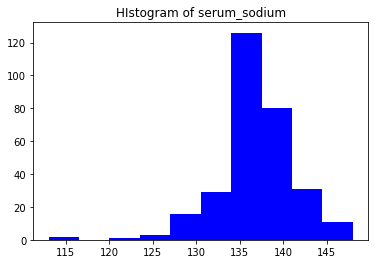

In [42]:
plt.hist(hf.serum_sodium,color='blue')
plt.title('HIstogram of serum_sodium')

Text(0.5, 1.0, 'Boxplot of serum_sodium')


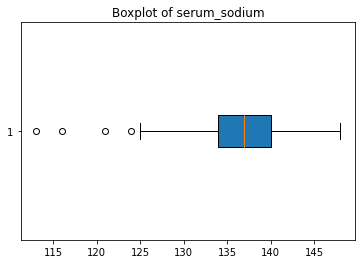

In [43]:
plt.boxplot(hf.serum_sodium,vert=False ,patch_artist=True)
print(plt.title('Boxplot of serum_sodium'))

### Outlier operation 

In [44]:
#Getting the Iqr, up_lim & low_lim
iqrhf = hf.serum_sodium.describe()['75%'] - hf.serum_sodium.describe()['25%'] 
low_lim = hf.serum_sodium.describe()['25%']-1.5*iqrhf
print(len(hf.serum_sodium[hf.serum_sodium < low_lim]) )


4


In [45]:
hf.serum_sodium.value_counts().sum()

299

### Comparing Serum_sodium Comlumn asn Target Variable

<AxesSubplot:xlabel='serum_sodium', ylabel='count'>

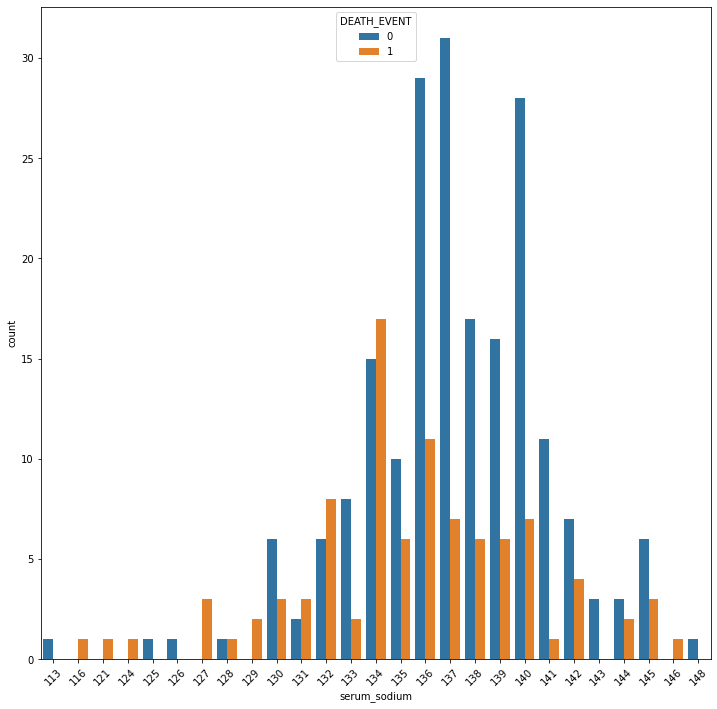

In [48]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.xticks(rotation=45)
sns.countplot(x="serum_sodium", hue="DEATH_EVENT", data=hf, )

### Visualising Sex Column

Text(0.5, 1.0, 'HIstogram of sex Column')

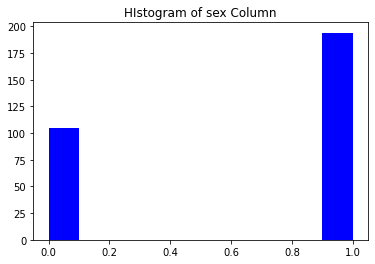

In [47]:
plt.hist(hf.sex,color='blue')
plt.title('HIstogram of sex Column')

Text(0.5, 1.0, 'Boxplot of Sex Column')


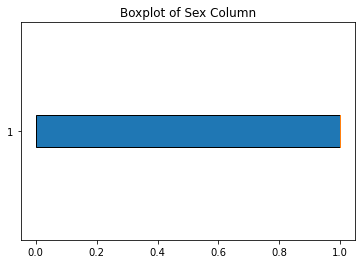

In [48]:


plt.boxplot(hf.sex,vert=False ,patch_artist=True)
print(plt.title('Boxplot of Sex Column'))


<AxesSubplot:xlabel='sex', ylabel='count'>

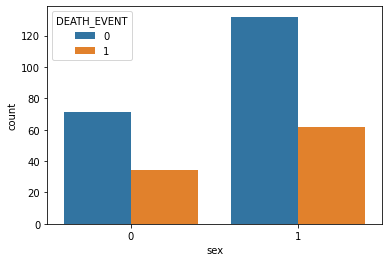

In [49]:
sns.countplot(x="sex", hue="DEATH_EVENT", data=hf, )

### Visualising Smoking Column

Text(0.5, 1.0, 'HIstogram of smoking')

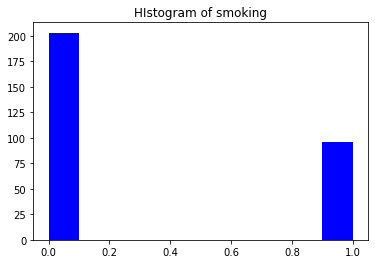

In [50]:

plt.hist(hf.smoking,color='blue')
plt.title('HIstogram of smoking')

Text(0.5, 1.0, 'Boxplot of smoking')


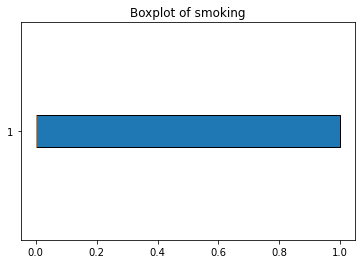

In [51]:


plt.boxplot(hf.smoking,vert=False ,patch_artist=True)
print(plt.title('Boxplot of smoking'))


<AxesSubplot:xlabel='smoking', ylabel='count'>

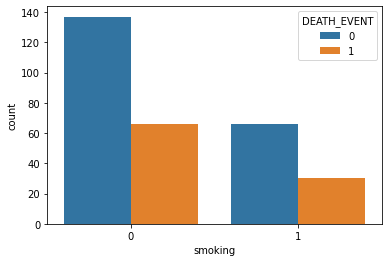

In [52]:
sns.countplot(x="smoking", hue="DEATH_EVENT", data=hf, )

### Visualising Time Column

Text(0.5, 1.0, 'HIstogram of time')

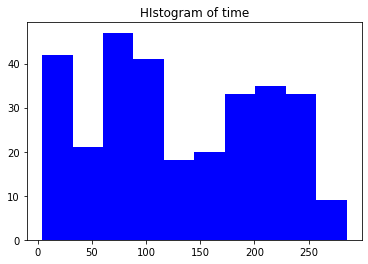

In [53]:

plt.hist(hf.time,color='blue')
plt.title('HIstogram of time')

Text(0.5, 1.0, 'Boxplot of time')


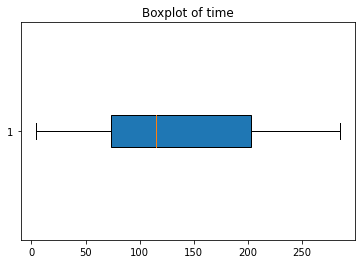

In [54]:


plt.boxplot(hf.time,vert=False ,patch_artist=True)
print(plt.title('Boxplot of time'))


### Comparing Time Column and Target Variable

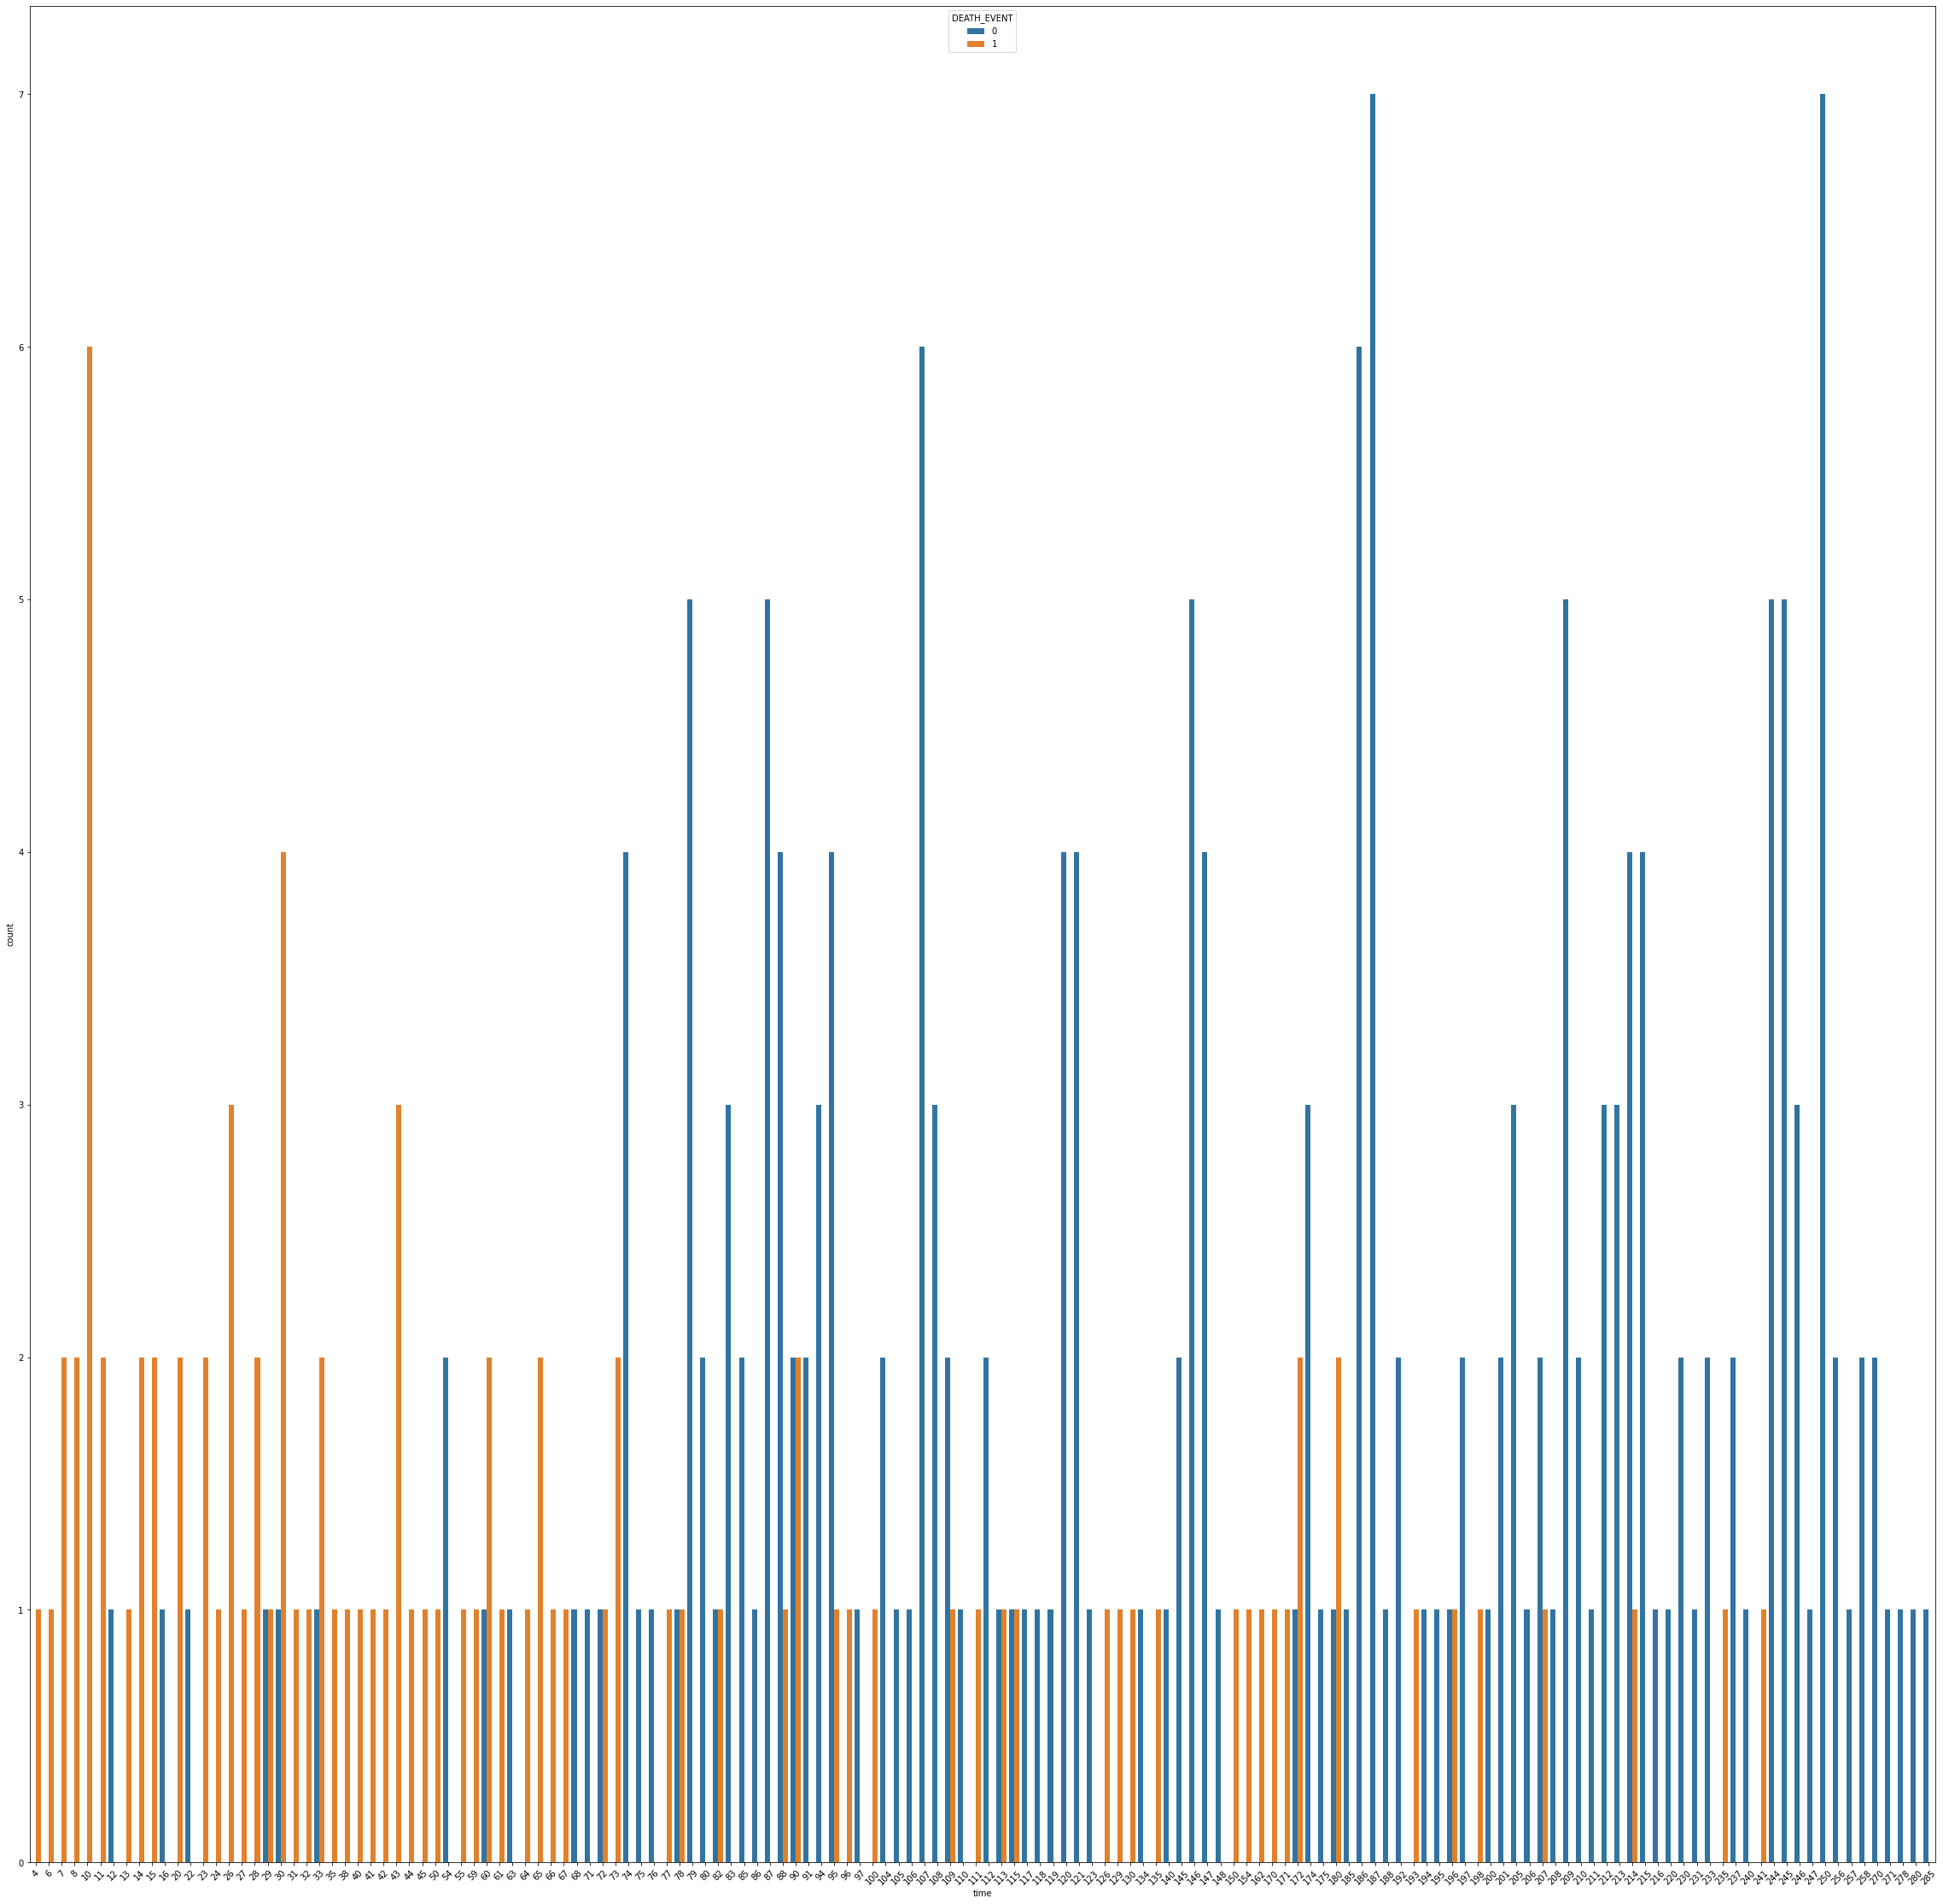

In [57]:
fig, ax = plt.subplots(figsize=(40, 40))
plt.xticks(rotation=45)

sns.countplot(x="time", hue="DEATH_EVENT", data=hf)
plt.show()


### Visualising Target Variable 

Text(0.5, 1.0, 'HIstogram of DEATH_EVENT')

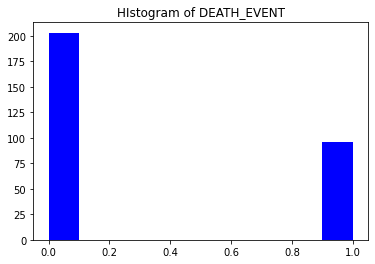

In [56]:

plt.hist(hf.DEATH_EVENT,color='blue')
plt.title('HIstogram of DEATH_EVENT')

Text(0.5, 1.0, 'Boxplot of DEATH_EVENT')


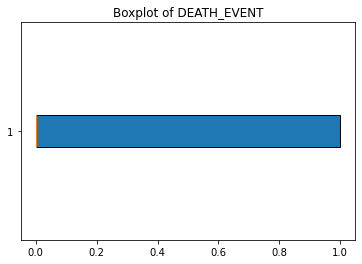

In [57]:
plt.boxplot(hf.DEATH_EVENT,vert=False ,patch_artist=True)
print(plt.title('Boxplot of DEATH_EVENT'))


### Correlation Matrix

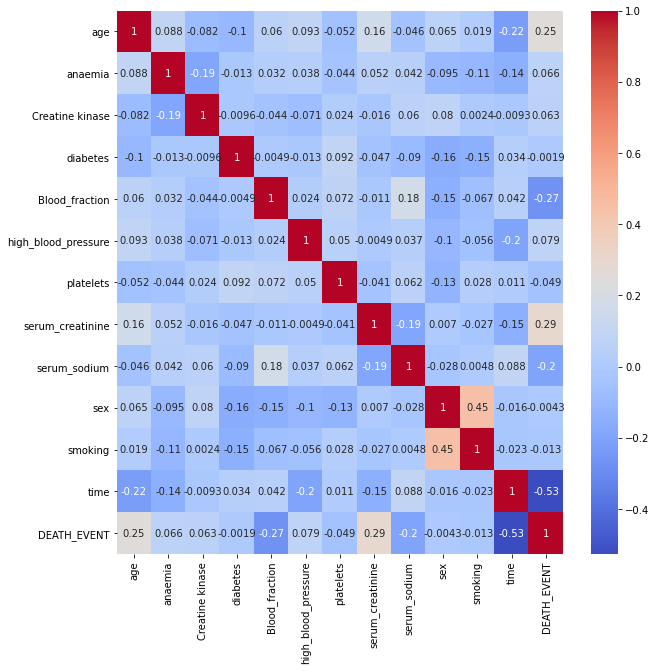

In [58]:

plt.figure(figsize=(10,10))
sns.heatmap(hf.corr(),  cmap='coolwarm', annot=True);

In [59]:
corr_matrix = hf.corr()
print(corr_matrix["DEATH_EVENT"].sort_values(ascending=False))

DEATH_EVENT            1.000000
serum_creatinine       0.294278
age                    0.253729
high_blood_pressure    0.079351
anaemia                0.066270
Creatine kinase        0.062728
diabetes              -0.001943
sex                   -0.004316
smoking               -0.012623
platelets             -0.049139
serum_sodium          -0.195204
Blood_fraction        -0.268603
time                  -0.526964
Name: DEATH_EVENT, dtype: float64


In [60]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    int64  
 2   Creatine kinase      299 non-null    int64  
 3   diabetes             299 non-null    int64  
 4   Blood_fraction       299 non-null    int64  
 5   high_blood_pressure  299 non-null    int64  
 6   platelets            299 non-null    float64
 7   serum_creatinine     299 non-null    float64
 8   serum_sodium         299 non-null    int64  
 9   sex                  299 non-null    int64  
 10  smoking              299 non-null    int64  
 11  time                 299 non-null    int64  
 12  DEATH_EVENT          299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [61]:
hf.head()

,age,anaemia,Creatine kinase,diabetes,Blood_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Converting Columns to Object Data type

In [62]:
hf['anaemia']=hf['anaemia'].astype('O')
hf['diabetes']=hf['diabetes'].astype('O')
hf['high_blood_pressure']=hf['high_blood_pressure'].astype('O')
hf['sex']=hf['sex'].astype('O')
hf['smoking']=hf['smoking'].astype('O')






In [63]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    object 
 2   Creatine kinase      299 non-null    int64  
 3   diabetes             299 non-null    object 
 4   Blood_fraction       299 non-null    int64  
 5   high_blood_pressure  299 non-null    object 
 6   platelets            299 non-null    float64
 7   serum_creatinine     299 non-null    float64
 8   serum_sodium         299 non-null    int64  
 9   sex                  299 non-null    object 
 10  smoking              299 non-null    object 
 11  time                 299 non-null    int64  
 12  DEATH_EVENT          299 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 30.5+ KB


### Model Building 

In [106]:

x=hf.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]

y=hf.iloc[:,12]

In [65]:
x.shape

(299, 11)

In [66]:
y.shape

(299,)

### Train Test Split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=0)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(209, 11)
(90, 11)
(209,)
(90,)


### Logistic Regression Model Building

In [69]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)



### Classification_report, Confusion Matrix, ROC Curve

In [70]:
print(classification_report(y_test,log_reg_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        62
           1       0.77      0.61      0.68        28

    accuracy                           0.82        90
   macro avg       0.81      0.76      0.78        90
weighted avg       0.82      0.82      0.82        90



In [71]:
confusion_matrix(y_test,log_reg_pred)

array([[57,  5],
       [11, 17]], dtype=int64)

In [72]:
fprLR, tprLR, thresholds =metrics.roc_curve(y_test, log_reg_pred)
roc_aucLR = auc(fprLR,tprLR)
print(roc_aucLR)

0.7632488479262672


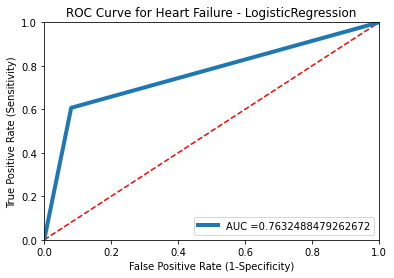

In [73]:
plt.title('ROC Curve for Heart Failure - LogisticRegression')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fprLR,tprLR, label = 'AUC =' +str(roc_aucLR), linewidth=4)
plt.legend(loc=4)
plt.show()

cols = ['Model', 'Accuracy', 'AUC']
Compare=pd.DataFrame(columns=cols)



In [74]:
LogisticRegression =pd.Series({'Model':'LogisticRegression','Accuracy':log_reg_acc,'AUC':roc_aucLR})
Compare=Compare.append(LogisticRegression,ignore_index=True)

### KNN Model Building

In [75]:

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
kn_acc = accuracy_score(y_test, kn_pred)



### Classification_report, Confusion matrix ,ROC curve KNN Model

In [77]:
print(classification_report(y_test,kn_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73        62
           1       0.24      0.14      0.18        28

    accuracy                           0.59        90
   macro avg       0.45      0.47      0.45        90
weighted avg       0.54      0.59      0.56        90



In [78]:
confusion_matrix(y_test,kn_pred)

array([[49, 13],
       [24,  4]], dtype=int64)

In [79]:
fprKNN, tprKNN, thresholds =metrics.roc_curve(y_test, kn_pred)
roc_aucKNN = auc(fprKNN,tprKNN)
print(roc_aucKNN)

0.466589861751152


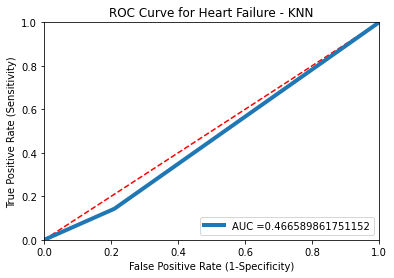

In [80]:
plt.title('ROC Curve for Heart Failure - KNN')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fprKNN, tprKNN, label = 'AUC =' +str(roc_aucKNN), linewidth=4)
plt.legend(loc=4)
plt.show()


In [81]:
KNN =pd.Series({'Model':'KNN','Accuracy':kn_acc,'AUC':roc_aucKNN})
Compare=Compare.append(KNN,ignore_index=True)

### Decision Tree Classifier Model Building

In [82]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)


In [83]:
print("Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  87.78%


### Classification report , Confusion Matrix , ROC Curve of  Decision Tree Model

In [84]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        62
           1       0.84      0.75      0.79        28

    accuracy                           0.88        90
   macro avg       0.87      0.84      0.85        90
weighted avg       0.88      0.88      0.88        90



In [85]:
confusion_matrix(y_test,dt_pred)

array([[58,  4],
       [ 7, 21]], dtype=int64)

In [86]:
fprDT, tprDT, thresholds =metrics.roc_curve(y_test, dt_pred)
roc_aucDT = auc(fprDT,tprDT)
print(roc_aucDT)

0.842741935483871


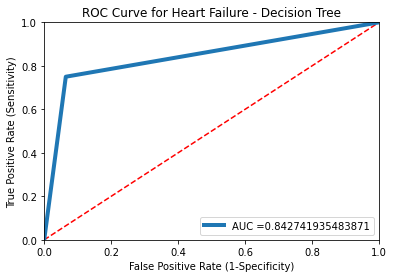

In [87]:
plt.title('ROC Curve for Heart Failure - Decision Tree')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fprDT, tprDT, label = 'AUC =' +str(roc_aucDT), linewidth=4)
plt.legend(loc=4)
plt.show()

In [88]:
DecisionTree =pd.Series({'Model':'Decision Tree','Accuracy':dt_acc,'AUC':roc_aucDT})
Compare=Compare.append(DecisionTree,ignore_index=True)

### Random Forest Classifier Model Building

In [89]:
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(X_train, y_train)
r_pred = r_clf.predict(X_test)
r_acc = accuracy_score(y_test, r_pred)


In [90]:
print("Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  88.89%


### Classifcation report,Confusion matrix,ROC Curve of Random Forest Model

In [91]:
print(classification_report(y_test,r_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        62
           1       0.88      0.75      0.81        28

    accuracy                           0.89        90
   macro avg       0.88      0.85      0.86        90
weighted avg       0.89      0.89      0.89        90



In [92]:
confusion_matrix(y_test,r_pred)

array([[59,  3],
       [ 7, 21]], dtype=int64)

In [93]:
fprRF, tprRF, thresholds =metrics.roc_curve(y_test, r_pred)
roc_aucRF = auc(fprRF,tprRF)
print(roc_aucRF)

0.8508064516129034


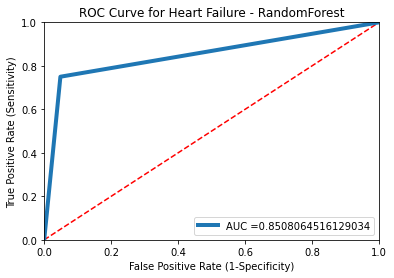

In [94]:
plt.title('ROC Curve for Heart Failure - RandomForest')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fprRF, tprRF, label = 'AUC =' +str(roc_aucRF), linewidth=4)
plt.legend(loc=4)
plt.show()

In [95]:
RandomForest =pd.Series({'Model':'Random Forest','Accuracy':r_acc,'AUC':roc_aucRF})
Compare=Compare.append(RandomForest,ignore_index=True)

In [96]:


gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(X_train,y_train)
gradientboost_pred = gradientboost_clf.predict(X_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)

fprgb,tprgb,thresholdsgb=metrics.roc_curve(y_test,gradientboost_pred)

### Classification report , Confusion Matrix ,ROC Curve of Gradient Boosting Classifier

In [97]:
print(classification_report(y_test,gradientboost_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        62
           1       0.88      0.82      0.85        28

    accuracy                           0.91        90
   macro avg       0.90      0.89      0.89        90
weighted avg       0.91      0.91      0.91        90



In [98]:
confusion_matrix(y_test,gradientboost_pred)

array([[59,  3],
       [ 5, 23]], dtype=int64)

In [99]:

roc_aucgb = auc(fprgb,tprgb)
print(roc_aucgb)

0.886520737327189


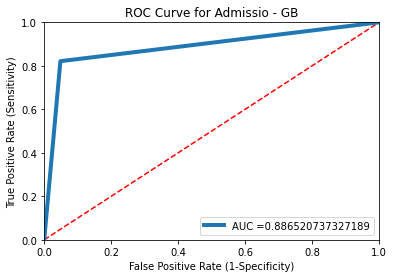

In [100]:
plt.title('ROC Curve for Admissio - GB')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fprgb, tprgb, label = 'AUC =' +str(roc_aucgb), linewidth=4)
plt.legend(loc=4)
plt.show()



In [101]:


gradientboost =pd.Series({'Model':'Gradient boosting','Accuracy':gradientboost_acc,'AUC':roc_aucgb})
Compare=Compare.append(gradientboost,ignore_index=True)

In [102]:
print( "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  91.11%


## Comparing  all Models

In [104]:
Compare

,Model,Accuracy,AUC
0,LogisticRegression,0.822222,0.763249
1,KNN,0.588889,0.466590
2,Decision Tree,0.877778,0.842742
3,Random Forest,0.888889,0.850806
4,Gradient boosting,0.911111,0.886521


## Gradient Boosting Classifier and Random Forest Classifier show Highest accuracy and Are Under curve 